In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt 

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# General Data Exploration

In [3]:
data = pd.read_csv("cc_merged_0429.csv",sep='\t',engine='python')

In [4]:
data.head(5)

,Unnamed: 0,index,year,caseid,opinion_type,judge_name,decision,date,Author,Affirmed,...,month_3m_b,month_3_b,length_3m_dif,txt,x_dem_p,length_3m_af,length_3m_be,length_be_dm,length_af_dm,length_dif_dm
0,0,2304,1993,X35807,contentMajOp,PER CURIAM,affirmed,1993-08-04,NaN,1.0,...,1993-05-04,1993-05-04,-1.099144,per curiam: charo appeals his sentence for co...,0.292902,49.758998,50.858142,-3.877441,-4.976585,-1.099144
1,1,2796,1992,X3AD9D,contentMajOp,LOGAN,affirmed,1992-11-13,LOGAN,1.0,...,1992-08-13,1992-08-13,1.663181,"logan , circuit judge. the only issue in this...",0.328425,52.334119,50.670939,-5.166051,-3.502871,1.663181
2,2,2805,1992,X3ADTB,contentMajOp,LOGAN,reversed,1992-12-29,LOGAN,0.0,...,1992-09-29,1992-09-29,-3.563471,"logan , circuit judge. defendant bernard d. r...",0.328425,50.282495,53.845966,-1.991025,-5.554496,-3.563471
3,3,2814,1997,X37GPR,contentMajOp,JOHN C,affirmed,1997-02-11,PORFILIO,1.0,...,1996-11-11,1996-11-11,0.760434,"john c. porfilio , circuit judge. defendant b...",0.360773,51.570342,50.809909,-5.027082,-4.266648,0.760434
4,4,2816,1999,X4QAM7,contentMajOp,HOLLOWAY,affirmed,1999-01-04,HOLLOWAY,1.0,...,1998-10-04,1998-10-04,-0.630426,"holloway , circuit judge. mr. unser brings th...",0.411135,59.568882,60.199308,4.362317,3.731892,-0.630426


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8434 entries, 0 to 8433
Columns: 261 entries, Unnamed: 0 to length_dif_dm
dtypes: float64(216), int64(19), object(26)
memory usage: 16.8+ MB


In [6]:
data.columns.values

array(['Unnamed: 0', 'index', 'year', 'caseid', 'opinion_type',
       'judge_name', 'decision', 'date', 'Author', 'Affirmed',
       'AffirmedInPart', 'Reversed', 'ReversedInPart', 'Vacated',
       'VacatedInPart', 'Circuit', 'judgeid1', 'judgeid2', 'judgeid3',
       'x_dem_x', 'x_republican_x', 'x_instate_ba_x', 'x_elev_x',
       'x_unity_x', 'x_aba_x', 'x_crossa_x', 'x_pfedjdge_x',
       'x_pindreg1_x', 'x_plawprof_x', 'x_pscab_x', 'x_pcab_x', 'x_pusa_x',
       'x_pssenate_x', 'x_paag_x', 'x_psp_x', 'x_pslc_x', 'x_pssc_x',
       'x_pshouse_x', 'x_psg_x', 'x_psgo_x', 'x_psenate_x', 'x_psatty_x',
       'x_pprivate_x', 'x_pmayor_x', 'x_plocct_x', 'x_phouse_x',
       'x_pgov_x', 'x_pda_x', 'x_pcc_x', 'x_pccoun_x', 'x_pausa_x',
       'x_pasatty_x', 'x_pag_x', 'x_pada_x', 'x_pgovt_x', 'x_llm_sjd_x',
       'x_protestant_x', 'x_evangelical_x', 'x_mainline_x',
       'x_noreligion_x', 'x_catholic_x', 'x_jewish_x', 'x_black_x',
       'x_nonwhite_x', 'x_female_x', 'x_jd_public_x', '

In [7]:
data_use = data[['index','Affirmed', 'AffirmedInPart', 'Reversed', 'ReversedInPart', 'Vacated', 'VacatedInPart','txt','length_3m_dif']]

In [8]:
data_use.head(5)

,index,Affirmed,AffirmedInPart,Reversed,ReversedInPart,Vacated,VacatedInPart,txt,length_3m_dif
0,2304,1.0,0.0,0.0,0.0,0.0,0.0,per curiam: charo appeals his sentence for co...,-1.099144
1,2796,1.0,0.0,0.0,0.0,0.0,0.0,"logan , circuit judge. the only issue in this...",1.663181
2,2805,0.0,0.0,1.0,0.0,0.0,0.0,"logan , circuit judge. defendant bernard d. r...",-3.563471
3,2814,1.0,0.0,0.0,0.0,0.0,0.0,"john c. porfilio , circuit judge. defendant b...",0.760434
4,2816,1.0,0.0,0.0,0.0,0.0,0.0,"holloway , circuit judge. mr. unser brings th...",-0.630426


In [9]:
data_use['txt'].iloc[0]

' per curiam: charo appeals his sentence for conspiracy to possess with intent to distribute cocaine and money laundering. he maintains that the district court erred in refusing to grant him a two-level reduction for acceptance of responsibility under u.s.s.g. 3e1.1(a) . he contends that he manifested acceptance of responsibility by admitting his involvement in the offense, showing remorse, and cooperating with law enforcement officials. the government responds that the district court\'s finding that charo had not accepted responsibility for the offense conduct was not clearly erroneous. the sentencing court\'s determination that a defendant is not entitled to a reduction for acceptance of responsibility is entitled to great deference and will not be overturned unless it is clearly erroneous. united states v. spraggins , 868 f.2d 1541, 1543 (11th cir.1989). section 3e1.1(a) requires a sentencing court to reduce the offense level by two levels "if the defendant clearly demonstrates a re

In [10]:
#train test split:

In [11]:
from sklearn.cross_validation import train_test_split
from numpy.random import RandomState

RS1 = RandomState(1)
train_data = data_use.sample(frac = 0.75, random_state = 200)
test_data = data_use.drop(train_data.index)

x_train = train_data['txt']
x_test = test_data['txt']
Y_train = train_data['length_3m_dif']
Y_test = test_data['length_3m_dif']

print(train_data.shape)
print(test_data.shape)

(6326, 9)
(2108, 9)


/share/apps/python3/3.5.3/intel/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
# tokenize the text using tfidf and count vectorizer, select the vectorizer
# that perform better for our task

In [13]:
%%time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

count_vectorizer_1gram = CountVectorizer(stop_words = 'english', binary = False)
count_vectorizer_2gram = CountVectorizer(stop_words = 'english', ngram_range = (1,2) , binary = False)
tfid_vectorizer_1gram = TfidfVectorizer(stop_words = 'english', binary = False)
tfid_vectorizer_2gram = TfidfVectorizer(stop_words = 'english', ngram_range= (1,2), binary = False)

count_vectorizer_1gram.fit(x_train)
count_vectorizer_2gram.fit(x_train)

tfid_vectorizer_1gram.fit(x_train)
tfid_vectorizer_2gram.fit(x_train)


#count_vectorizer
count_train_1gram = count_vectorizer_1gram.transform(x_train)
count_test_1gram = count_vectorizer_1gram.transform(x_test)

count_train_2gram = count_vectorizer_2gram.transform(x_train)
count_test_2gram = count_vectorizer_2gram.transform(x_test)

#tfid_vectorizer
tf_train_1gram = tfid_vectorizer_1gram.transform(x_train)
tf_test_1gram = tfid_vectorizer_1gram.transform(x_test)

tf_train_2gram = tfid_vectorizer_2gram.transform(x_train)
tf_test_2gram = tfid_vectorizer_2gram.transform(x_test)

CPU times: user 3min 41s, sys: 3.49 s, total: 3min 45s
Wall time: 3min 45s


In [9]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [15]:
#count 1 gram:

In [16]:
lr_base_count_1gram = linear_model.LinearRegression()
lr_base_count_1gram.fit(count_train_1gram, Y_train)
lr_base_count_1gram_pred = lr_base_count_1gram.predict(count_test_1gram)
count_1gram_base_mae = mean_absolute_error(Y_test, lr_base_count_1gram_pred)

In [17]:
count_1gram_base_mae

2.69964025579824

In [18]:
count_1gram_base_mae_r2 = r2_score(Y_test, lr_base_count_1gram_pred)

In [19]:
count_1gram_base_mae_r2

-2.8035214992717261

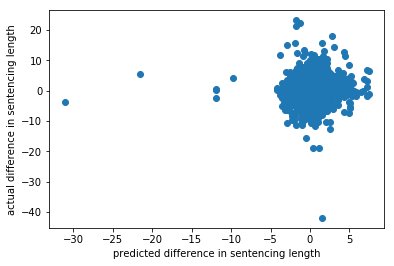

In [268]:
plt.scatter(Y_test,lr_base_count_1gram_pred)
plt.xlabel('predicted difference in sentencing length')
plt.ylabel('actual difference in sentencing length')
plt.show()

In [21]:
#count 2 gram:

In [22]:
lr_base_count_2gram = linear_model.LinearRegression()
lr_base_count_2gram.fit(count_train_2gram, Y_train)
lr_base_count_2gram_pred = lr_base_count_2gram.predict(count_test_2gram)
count_2gram_base_mae = mean_absolute_error(Y_test, lr_base_count_2gram_pred)

In [23]:
count_2gram_base_mae

1.7585600238429082

In [24]:
count_2gram_base_mae_r2 = r2_score(Y_test, lr_base_count_2gram_pred)

In [25]:
count_2gram_base_mae_r2

-0.53133179890467885

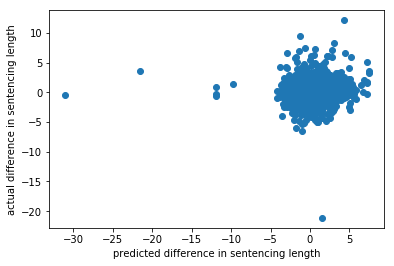

In [267]:
plt.scatter(Y_test,lr_base_count_2gram_pred)
plt.xlabel('predicted difference in sentencing length')
plt.ylabel('actual difference in sentencing length')
plt.show()

In [27]:
# tfidf 1 gram:

In [28]:
lr_base_tfidf_1gram = linear_model.LinearRegression()
lr_base_tfidf_1gram.fit(tf_train_1gram, Y_train)
lr_base_tfidf_1gram_pred = lr_base_tfidf_1gram.predict(tf_test_1gram)
tfidf_1gram_base_mae = mean_absolute_error(Y_test, lr_base_tfidf_1gram_pred)

In [29]:
tfidf_1gram_base_mae

1.7085882973015794

In [30]:
tfidf_1gram_base_mae_r2 = r2_score(Y_test, lr_base_tfidf_1gram_pred)

In [31]:
tfidf_1gram_base_mae_r2

-0.37162225423885853

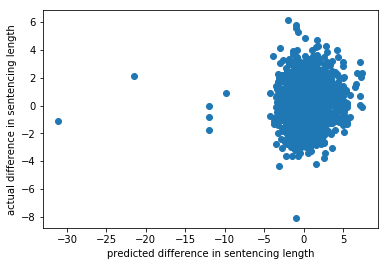

In [269]:
plt.scatter(Y_test,lr_base_tfidf_1gram_pred)
plt.xlabel('predicted difference in sentencing length')
plt.ylabel('actual difference in sentencing length')
plt.show()

In [33]:
# tfidf 2 gram:

In [34]:
lr_base_tfidf_2gram = linear_model.LinearRegression()
lr_base_tfidf_2gram.fit(tf_train_2gram, Y_train)
lr_base_tfidf_2gram_pred = lr_base_tfidf_2gram.predict(tf_test_2gram)
tfidf_2gram_base_mae = mean_absolute_error(Y_test, lr_base_tfidf_2gram_pred)

In [35]:
tfidf_2gram_base_mae

1.4516721052128747

In [36]:
tfidf_2gram_base_mae_r2 = r2_score(Y_test, lr_base_tfidf_2gram_pred)

In [37]:
tfidf_2gram_base_mae_r2

-0.072263646659945113

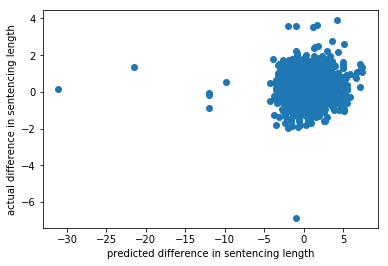

In [270]:
plt.scatter(Y_test,lr_base_tfidf_2gram_pred)
plt.xlabel('predicted difference in sentencing length')
plt.ylabel('actual difference in sentencing length')
plt.show()

# fitting the text feature combined with the reversed/affirm decision into a neural network. To see how our data perform in a deep nerual net model.

In [40]:
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import sparse_random_matrix

#input sparse matrix: tf_train_2gram, tf_test_2gram
svd = TruncatedSVD(n_components=80, n_iter=7, random_state=42)
svd.fit(tf_train_2gram)  
TruncatedSVD(algorithm='randomized', n_components=50, n_iter=7,
        random_state=42, tol=0.0)

svd_train = svd.transform(tf_train_2gram)
svd_test = svd.transform(tf_test_2gram)
print(svd.explained_variance_ratio_)  
print(svd.explained_variance_ratio_.sum())  

[ 0.00246613  0.00466438  0.0033177   0.00273369  0.00263453  0.00247129
  0.00233313  0.00209636  0.00202032  0.00186841  0.00175678  0.00169007
  0.00149295  0.00147398  0.00146348  0.00139788  0.00136532  0.00135417
  0.0013412   0.00131931  0.00126959  0.00121461  0.00120349  0.0011521
  0.00113406  0.00112939  0.00111907  0.00110137  0.0010816   0.00104323
  0.00103074  0.00099091  0.00097298  0.00094979  0.00094327  0.00093012
  0.00092094  0.00090753  0.00088763  0.00087595  0.00086402  0.00086237
  0.00084706  0.00083933  0.00082278  0.00081538  0.00080988  0.00080583
  0.00079532  0.00079216  0.00077237  0.00076855  0.00076194  0.00076138
  0.0007418   0.00073655  0.00073447  0.00072773  0.00072099  0.00070834
  0.00070705  0.00069969  0.00069347  0.00068781  0.0006811   0.00067255
  0.00066227  0.00065802  0.00064985  0.00064482  0.00064278  0.00063622
  0.00062344  0.000613    0.00061101  0.00060383  0.00059877  0.0005929
  0.00058696  0.00058051]
0.0906536781336


In [42]:
#################
##dataframe approach

In [200]:
svd_train_df = pd.DataFrame(data = svd_train, index=train_data.index)

In [201]:
svd_test_df = pd.DataFrame(data = svd_test, index = test_data.index)

In [202]:
svd_train_df[['index','Affirmed', 'AffirmedInPart', 'Reversed', 'ReversedInPart', 'Vacated', 'VacatedInPart','length_3m_dif']] = train_data[['index','Affirmed', 'AffirmedInPart', 'Reversed', 'ReversedInPart', 'Vacated', 'VacatedInPart','length_3m_dif']]
svd_test_df[['index','Affirmed', 'AffirmedInPart', 'Reversed', 'ReversedInPart', 'Vacated', 'VacatedInPart','length_3m_dif']] = test_data[['index','Affirmed', 'AffirmedInPart', 'Reversed', 'ReversedInPart', 'Vacated', 'VacatedInPart','length_3m_dif']]


In [203]:
svd_train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,78,79,index,Affirmed,AffirmedInPart,Reversed,ReversedInPart,Vacated,VacatedInPart,length_3m_dif
5577,0.136688,-0.040999,-0.004375,-0.007436,-0.006002,-0.034239,0.046198,-0.008634,-0.008428,0.013910,...,0.033283,0.000926,35638,0.0,0.0,0.0,1.0,0.0,0.0,-0.766357
2072,0.100533,0.021049,0.007305,0.001948,0.001179,-0.019895,-0.008439,0.018857,-0.024885,-0.014900,...,0.003150,-0.004419,24468,1.0,0.0,0.0,0.0,0.0,0.0,0.608711
7052,0.157620,-0.026298,-0.043520,-0.057402,-0.039799,0.026700,0.008013,-0.012378,-0.011192,-0.021375,...,-0.004125,0.002743,39230,1.0,0.0,0.0,0.0,0.0,0.0,0.228592
1582,0.141970,-0.026448,-0.080584,-0.054681,-0.016293,0.081749,-0.037343,0.017813,-0.010692,-0.000912,...,0.060335,-0.017806,22883,1.0,0.0,0.0,0.0,0.0,0.0,-3.150298
587,0.143912,-0.047580,0.005257,-0.058490,0.036348,-0.016142,0.052118,-0.038125,-0.005855,0.016747,...,0.000847,-0.002067,16551,0.0,0.0,0.0,0.0,0.0,0.0,-2.467751


In [204]:
svd_test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,78,79,index,Affirmed,AffirmedInPart,Reversed,ReversedInPart,Vacated,VacatedInPart,length_3m_dif
2,0.119560,-0.025109,0.006438,-0.007404,0.016002,-0.019776,0.026109,-0.022353,-0.004703,0.016800,...,0.009664,-0.000136,2805,0.0,0.0,1.0,0.0,0.0,0.0,-3.563471
5,0.225139,-0.005882,-0.016542,-0.041020,0.020823,-0.080195,-0.008058,0.229446,0.192719,-0.001701,...,0.024659,-0.018850,2817,1.0,0.0,0.0,0.0,0.0,0.0,3.591201
17,0.335446,-0.088022,-0.039261,-0.161905,-0.059537,0.038900,0.040520,0.014652,-0.039186,-0.038314,...,-0.006725,0.027584,3065,1.0,0.0,0.0,0.0,0.0,0.0,0.959357
18,0.099370,-0.008746,0.038461,0.022873,0.025342,-0.033024,0.035557,-0.004343,-0.004816,0.044422,...,0.001024,0.012109,3392,1.0,0.0,0.0,0.0,0.0,0.0,-1.595323
23,0.248678,-0.052280,-0.046642,-0.072317,-0.028221,0.027054,0.023326,0.031732,-0.029729,-0.031930,...,0.002573,-0.002373,3498,1.0,0.0,0.0,0.0,0.0,0.0,-2.045180


In [205]:
svd_train_df['res']=svd_train_df['Affirmed']+svd_train_df['AffirmedInPart']+svd_train_df['Reversed']+svd_train_df['ReversedInPart']+svd_train_df['Vacated']+svd_train_df['VacatedInPart']
svd_test_df['res']=svd_test_df['Affirmed']+svd_test_df['AffirmedInPart']+svd_test_df['Reversed']+svd_test_df['ReversedInPart']+svd_test_df['Vacated']+svd_test_df['VacatedInPart']

In [206]:
#keep only row with res ==1
svd_train_df=svd_train_df[svd_train_df['res']==1]
svd_test_df=svd_test_df[svd_test_df['res']==1]

In [207]:
def combine_reverse(row):
    if row['Reversed']==1:
        return 2
    
    elif row['Vacated']==1:
        return 2
    
    elif row['Affirmed']==1:
        return 1

In [208]:
svd_train_df['Res_binary'] = svd_train_df.apply(combine_reverse, axis=1)
svd_test_df['Res_binary'] = svd_test_df.apply(combine_reverse, axis=1)

In [209]:
svd_train_df=svd_train_df[(svd_train_df['Res_binary']==1) | (svd_train_df['Res_binary']==2)]
svd_test_df=svd_test_df[(svd_test_df['Res_binary']==1) | (svd_test_df['Res_binary']==2)]

In [210]:
svd_train_df= svd_train_df.drop(['Affirmed', 'AffirmedInPart', 'Reversed', 'ReversedInPart', 'Vacated', 'VacatedInPart','res'],axis=1)
svd_test_df= svd_test_df.drop(['Affirmed', 'AffirmedInPart', 'Reversed', 'ReversedInPart', 'Vacated', 'VacatedInPart','res'],axis=1)

In [211]:
svd_train_nn_df = svd_train_df.iloc[:,:]
svd_test_nn_df = svd_test_df.iloc[:,:]

In [212]:
svd_train_nn_df['y'] = svd_train_df['length_3m_dif']
svd_test_nn_df['y'] = svd_test_df['length_3m_dif']

In [213]:
svd_train_nn_df.drop(['length_3m_dif','index'],axis=1, inplace=True)
svd_test_nn_df.drop(['length_3m_dif','index'],axis=1,inplace=True)

In [215]:
svd_train_nn_df.head()

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,Res_binary,y
2072,0.100533,0.021049,0.007305,0.001948,0.001179,-0.019895,-0.008439,0.018857,-0.024885,-0.014900,...,0.007469,-0.002709,0.018256,0.000921,-0.016751,-0.000313,0.003150,-0.004419,1.0,0.608711
7052,0.157620,-0.026298,-0.043520,-0.057402,-0.039799,0.026700,0.008013,-0.012378,-0.011192,-0.021375,...,0.003264,0.016863,-0.008680,0.017289,-0.012610,-0.027626,-0.004125,0.002743,1.0,0.228592
1582,0.141970,-0.026448,-0.080584,-0.054681,-0.016293,0.081749,-0.037343,0.017813,-0.010692,-0.000912,...,0.018319,0.009916,0.033197,-0.019105,0.019378,0.109131,0.060335,-0.017806,1.0,-3.150298
2054,0.190061,0.104727,0.008652,0.053561,0.034232,0.072467,0.050863,-0.012928,-0.008381,0.014233,...,0.030851,-0.009701,0.009954,-0.044379,-0.006101,-0.011122,-0.019106,-0.000104,1.0,-1.195514
6602,0.228796,-0.007014,0.070923,-0.003444,-0.030451,-0.000764,0.019736,-0.031986,-0.012740,0.044786,...,0.029470,-0.000433,0.028144,-0.002859,0.019277,-0.010504,0.002817,-0.016495,2.0,-0.082692


In [216]:
#save the data (after dimension reduction)
svd_train_nn_df.to_csv("train_nn.csv", sep=',')
svd_test_nn_df.to_csv("test_nn.csv", sep=',')

In [ ]:
#svd_train_nn_df = pd.read_csv("nn_prepared_svd_train.csv", sep=',')
#svd_test_nn_df = pd.read_csv("nn_prepared_svd_test.csv", sep=',')

In [217]:
#basic nn architecture:
import torch
import numpy as np
from torch.autograd import Variable
import torch.nn.functional as F

#used for batch training:
import torch.utils.data as Data

In [218]:
xy_train = np.loadtxt("train_nn.csv", delimiter = ',' ,skiprows=1, dtype= np.float64 )
xy_test = np.loadtxt("test_nn.csv", delimiter = ',', skiprows =1 ,dtype = np.float64)

In [220]:
xy_train.shape

(5533, 83)

In [221]:
#########################
#########################
#prepare data for direct training

In [222]:
x_test = torch.from_numpy(xy_test[:,1:-1])
y_test = torch.from_numpy(xy_test[:,[-1]])

In [223]:
x_test = Variable(x_test.float())
y_test = Variable(y_test.float())

In [224]:
x_validation = torch.from_numpy(xy_train[:1265,1:-1])
y_validation = torch.from_numpy(xy_train[:1265,[-1]])
x_train = torch.from_numpy(xy_train[1265:,1:-1])
y_train = torch.from_numpy(xy_train[1265:,[-1]])

In [225]:
x_validation = Variable(x_validation.float())
y_validation = Variable(y_validation.float())
x_train = Variable(x_train.float())
y_train = Variable(y_train.float())

In [226]:
#define our own nn:
class Net(torch.nn.Module):
    def __init__(self, n_features, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden=torch.nn.Linear(n_features,n_hidden) 
        self.hidden2 = torch.nn.Linear(n_hidden, n_hidden)
        self.predict=torch.nn.Linear(n_hidden,1) 
    #forward:
    def forward(self,x):
        x=F.relu(self.hidden(x)) 
        x=self.hidden2(x)
        x=self.predict(x) 
        return x

In [227]:
x_train

Variable containing:
 1.2059e-01  7.8051e-02 -4.7009e-02  ...  -5.0610e-04 -2.6548e-02  1.0000e+00
 1.3144e-01 -5.8033e-03  5.1376e-02  ...  -6.2423e-03 -1.4356e-02  2.0000e+00
 9.8614e-02 -6.2820e-02 -6.5716e-02  ...   1.0115e-02 -1.3742e-02  1.0000e+00
                ...                   ⋱                   ...                
 2.0341e-01 -4.0337e-02 -1.0333e-01  ...  -4.9230e-02  2.6367e-02  1.0000e+00
 1.9376e-01  1.0681e-01  1.4803e-02  ...  -6.4434e-03 -4.5955e-02  1.0000e+00
 8.8230e-02 -1.2538e-02  7.0084e-02  ...   1.1423e-03 -9.6509e-03  1.0000e+00
[torch.FloatTensor of size 4268x81]

In [228]:
#initialize the net:
n_features = 81
net = Net(81, 40, 1)

In [229]:
print(net)

Net (
  (hidden): Linear (81 -> 40)
  (hidden2): Linear (40 -> 40)
  (predict): Linear (40 -> 1)
)


In [230]:
optimizer=torch.optim.SGD(net.parameters(),lr=0.03)
loss_func=torch.nn.MSELoss()
loss_func_MAe=torch.nn.L1Loss()

In [231]:
#batch training:
Train_BATCH_SIZE = 200
Validate_BATCH_SIZE = 126

x_validation = torch.from_numpy(xy_train[:1260,1:-1])
y_validation = torch.from_numpy(xy_train[:1260,[-1]])
x_train = torch.from_numpy(xy_train[1260:,1:-1])
y_train = torch.from_numpy(xy_train[1260:,[-1]])

torch_dataset_train = Data.TensorDataset(data_tensor = x_train, target_tensor = y_train)
train_loader = Data.DataLoader(
    dataset = torch_dataset_train,
    batch_size = Train_BATCH_SIZE,
    shuffle = True,
    num_workers = 2,)

torch_dataset_validate = Data.TensorDataset(data_tensor = x_validation, target_tensor = y_validation)
validate_loader = Data.DataLoader(
    dataset = torch_dataset_validate,
    batch_size = Validate_BATCH_SIZE,
    shuffle = True,
    num_workers = 2,)

In [232]:
#training:
#train too many steps will leads to overfit
#how to determine what is the stopping criterion of the training:
#---- one solution is 
validation_loss = []
for epoch in range(100):
    for step, (batch_x, batch_y) in enumerate(train_loader):
        print('Epoch:', epoch, '| Step: ', step)
        
        b_x = Variable(batch_x.float())
        b_y = Variable(batch_y.float())
        
        prediction = net(b_x)
        train_loss = loss_func(prediction, b_y)
        print('training loss is: ',train_loss.data[0])
        print('\n')

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
        #validation loss:
        if (step+1) % 13 ==0:
            sum_validation_loss = 0
            count = 0
            for s, (batch_x_validate, batch_y_validate) in enumerate(validate_loader):
                batch_x_validate = Variable(batch_x_validate.float())
                batch_y_validate = Variable(batch_y_validate.float())
                validation_output = net(batch_x_validate)
                #print(loss_func(validation_output, batch_y_validate).data[0])
                sum_validation_loss += loss_func(validation_output, batch_y_validate).data[0]
                count+=1
            validation_loss.append(sum_validation_loss/count)
            print("validation loss is {}".format(validation_loss[-1]))
            print('\n')
            print('\n')

            

Epoch: 0 | Step:  0
training loss is:  3.069209337234497


Epoch: 0 | Step:  1
training loss is:  3.3174920082092285


Epoch: 0 | Step:  2
training loss is:  3.025050163269043


Epoch: 0 | Step:  3
training loss is:  3.0972373485565186


Epoch: 0 | Step:  4
training loss is:  2.6433212757110596


Epoch: 0 | Step:  5
training loss is:  2.3488526344299316


Epoch: 0 | Step:  6
training loss is:  2.921114444732666


Epoch: 0 | Step:  7
training loss is:  4.0220441818237305


Epoch: 0 | Step:  8
training loss is:  4.0584516525268555


Epoch: 0 | Step:  9
training loss is:  3.4626169204711914


Epoch: 0 | Step:  10
training loss is:  3.464083194732666


Epoch: 0 | Step:  11
training loss is:  2.6654350757598877


Epoch: 0 | Step:  12
training loss is:  3.618847608566284


validation loss is 3.0065675735473634




Epoch: 0 | Step:  13
training loss is:  2.9463608264923096


Epoch: 0 | Step:  14
training loss is:  5.31777286529541


Epoch: 0 | Step:  15
training loss is:  2.992253065109253




In [234]:
#find where the validation error is the at minimum:
np.argmin(validation_loss)

98

In [ ]:
#so the optimal training steps are 98* 13

In [236]:
#final model for nn:
count = 0
for epoch in range(100):
    for step, (batch_x, batch_y) in enumerate(train_loader):
        print('Epoch:', epoch, '| Step: ', step)
        
        b_x = Variable(batch_x.float())
        b_y = Variable(batch_y.float())
        
        prediction = net(b_x)
        train_loss = loss_func(prediction, b_y)
        print('training loss is: ',train_loss.data[0])
        print('\n')

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
        if count+1 == 98 * 13:
            break
        
        count +=1
        

Epoch: 0 | Step:  0
training loss is:  3.1945407390594482


Epoch: 0 | Step:  1
training loss is:  2.735752820968628


Epoch: 0 | Step:  2
training loss is:  2.872418165206909


Epoch: 0 | Step:  3
training loss is:  2.879749059677124


Epoch: 0 | Step:  4
training loss is:  2.6705987453460693


Epoch: 0 | Step:  5
training loss is:  2.557917356491089


Epoch: 0 | Step:  6
training loss is:  3.2785110473632812


Epoch: 0 | Step:  7
training loss is:  3.6813132762908936


Epoch: 0 | Step:  8
training loss is:  2.8625879287719727


Epoch: 0 | Step:  9
training loss is:  2.767526865005493


Epoch: 0 | Step:  10
training loss is:  2.572329521179199


Epoch: 0 | Step:  11
training loss is:  4.862743377685547


Epoch: 0 | Step:  12
training loss is:  3.2131075859069824


Epoch: 0 | Step:  13
training loss is:  3.3542590141296387


Epoch: 0 | Step:  14
training loss is:  2.701188087463379


Epoch: 0 | Step:  15
training loss is:  2.9821484088897705


Epoch: 0 | Step:  16
training loss is:  3.

In [273]:
#final prediction
final_prediction_y = net(x_test).data.numpy()
true_y = y_test.data.numpy()
plt.scatter(true_y, final_prediction_y)

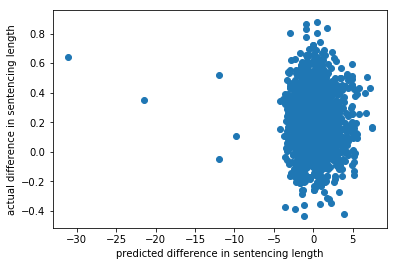

In [274]:
plt.xlabel('predicted difference in sentencing length')
plt.ylabel('actual difference in sentencing length')
plt.show()

In [239]:
#final result avoid overfitting
print('mean squared error is: {}'.format(mean_squared_error(true_y, final_prediction_y)))
print('mean absolute error is {}'.format(mean_absolute_error(true_y, final_prediction_y)))

mean squared error is: 4.170378684997559
mean absolute error is 1.4059722423553467


In [82]:
#compare Neural Network result with GBR with its best parameters performance

In [240]:
svd_train_df

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,Res_binary,y
2072,0.100533,0.021049,0.007305,0.001948,0.001179,-0.019895,-0.008439,0.018857,-0.024885,-0.014900,...,0.007469,-0.002709,0.018256,0.000921,-0.016751,-0.000313,0.003150,-0.004419,1.0,0.608711
7052,0.157620,-0.026298,-0.043520,-0.057402,-0.039799,0.026700,0.008013,-0.012378,-0.011192,-0.021375,...,0.003264,0.016863,-0.008680,0.017289,-0.012610,-0.027626,-0.004125,0.002743,1.0,0.228592
1582,0.141970,-0.026448,-0.080584,-0.054681,-0.016293,0.081749,-0.037343,0.017813,-0.010692,-0.000912,...,0.018319,0.009916,0.033197,-0.019105,0.019378,0.109131,0.060335,-0.017806,1.0,-3.150298
2054,0.190061,0.104727,0.008652,0.053561,0.034232,0.072467,0.050863,-0.012928,-0.008381,0.014233,...,0.030851,-0.009701,0.009954,-0.044379,-0.006101,-0.011122,-0.019106,-0.000104,1.0,-1.195514
6602,0.228796,-0.007014,0.070923,-0.003444,-0.030451,-0.000764,0.019736,-0.031986,-0.012740,0.044786,...,0.029470,-0.000433,0.028144,-0.002859,0.019277,-0.010504,0.002817,-0.016495,2.0,-0.082692
7532,0.144139,0.128313,-0.015371,0.029075,-0.019189,-0.068175,-0.039146,0.038496,-0.071963,-0.031979,...,0.010524,-0.010152,0.026670,0.071666,0.026278,-0.038351,-0.005259,0.004339,1.0,-1.952032
3083,0.095873,-0.019261,0.031074,-0.017900,0.007718,-0.023413,0.016189,0.009415,-0.020744,0.003223,...,0.007099,-0.013895,-0.031551,-0.001493,-0.022240,0.003993,0.008809,0.011543,1.0,0.855352
2388,0.195317,0.067205,0.000734,0.048019,0.072217,0.043359,0.006027,-0.033956,0.021628,-0.000014,...,0.014765,0.024269,-0.036191,-0.026400,-0.025293,0.002643,0.067023,0.021221,1.0,3.731262
6609,0.150863,-0.070331,-0.008770,-0.027240,-0.048602,-0.031284,0.029797,0.171062,0.164740,-0.016277,...,0.000865,0.008336,0.016944,0.014142,0.009529,0.005552,-0.008048,0.021765,1.0,0.729401
7681,0.121016,-0.015463,-0.021101,-0.043039,0.038102,0.030395,0.007071,-0.025070,-0.005048,0.030557,...,0.005886,0.025401,0.005997,-0.018488,0.010354,-0.004134,0.008201,-0.019747,2.0,0.760434


In [241]:
%%time
gbr = GradientBoostingRegressor()
parameters = {'n_estimators': [10, 50, 100, 200, 300], 'max_depth':[2,3,4,5], 'max_features':['auto','sqrt','log2']}
gbr_cv = GridSearchCV(gbr, parameters)
gbr_cv.fit(svd_train_df.iloc[:,:-1], svd_train_df.iloc[:,-1])


CPU times: user 3min 56s, sys: 77.1 ms, total: 3min 56s
Wall time: 3min 56s


In [242]:
gbr_cv.best_params_

{'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 10}

In [243]:
gbr_opt = GradientBoostingRegressor(max_depth= 2, max_features='log2', n_estimators= 10)
gbr_opt.fit(svd_train_df.iloc[:,:-1], svd_train_df.iloc[:,-1])

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2,
             max_features='log2', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=10, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [244]:
gbr_opt_tfidf_2gram_pred = gbr_opt.predict(svd_test_df.iloc[:,:-1])
gbr_opt_tfidf_2gram_mse = mean_squared_error(svd_test_df.iloc[:,-1], gbr_opt_tfidf_2gram_pred)
gbr_opt_tfidf_2gram_mae = mean_absolute_error(svd_test_df.iloc[:,-1], gbr_opt_tfidf_2gram_pred)

In [245]:
print('mean squared error is {}'.format(gbr_opt_tfidf_2gram_mse))
print('mean absolute error is {}'.format(gbr_opt_tfidf_2gram_mae))

mean squared error is 4.112428151515572
mean absolute error is 1.3932484102878269


# Look at R^2:

In [4]:
inference_data = pd.read_csv('bio_txt.csv')

In [5]:
true_df = inference_data[['index','0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24','Res_binary', 'length_3m_dif']]

In [6]:
predicted_df = inference_data[['index','0_hat', '1_hat', '2_hat', '3_hat',
       '4_hat', '5_hat', '6_hat', '7_hat', '8_hat', '9_hat', '10_hat',
       '11_hat', '12_hat', '13_hat', '14_hat', '15_hat', '16_hat',
       '17_hat', '18_hat', '19_hat', '20_hat', '21_hat', '22_hat',
       '23_hat', '24_hat','Res_binary','length_3m_dif']]

In [7]:
predicted_df = predicted_df.drop(['index'],axis=1)
true_df = true_df.drop(['index'],axis=1)

In [8]:
#prepare data:
msk = np.random.rand(7388) < 0.8

predicted_df_x = predicted_df.iloc[:,:-1]
predicted_df_y = predicted_df.iloc[:,-1]

predicted_df_train_x = predicted_df_x[msk]
predicted_df_test_x = predicted_df_x[~msk]

predicted_df_train_y = predicted_df_y[msk]
predicted_df_test_y = predicted_df_y[~msk]


true_df_x = true_df.iloc[:,:-1]
true_df_y = true_df.iloc[:,-1]

true_df_train_x = true_df_x[msk]
true_df_test_x = true_df_x[~msk]

true_df_train_y = true_df_y[msk]
true_df_test_y = true_df_y[~msk]

In [ ]:
#random forest regressor:

In [11]:
#predicted values R2 score
rfr_predicted_r2 = RandomForestRegressor(n_estimators=1000)
rfr_predicted_r2.fit(predicted_df_train_x, predicted_df_train_y)
rfr_predicted_r2_pred = rfr_predicted_r2.predict(predicted_df_test_x)

rfr_predicted_r2score = r2_score(predicted_df_test_y,rfr_predicted_r2_pred)

In [12]:
print(rfr_predicted_r2score)

-0.0117588985546


In [14]:
#True values R2 score
rfr_true_r2 = RandomForestRegressor(n_estimators=1000)
rfr_true_r2.fit(predicted_df_train_x, predicted_df_train_y)
rfr_true_r2_pred = rfr_true_r2.predict(predicted_df_test_x)

rfr_true_r2score = r2_score(predicted_df_test_y,rfr_true_r2_pred)

In [15]:
print(rfr_true_r2score)

-0.0102580076061


In [16]:
#Linear regression

In [21]:
#predicted value R2 score
lr_predicted_r2= linear_model.LinearRegression()
lr_predicted_r2.fit(predicted_df_train_x, predicted_df_train_y)
lr_predicted_r2_pred = lr_predicted_r2.predict(predicted_df_test_x)

lr_predicted_r2score = r2_score(predicted_df_test_y,lr_predicted_r2_pred)

In [22]:
print(lr_predicted_r2score)

0.00498929305651


In [23]:
#True values R2 score
lr_true_r2= linear_model.LinearRegression()
lr_true_r2.fit(true_df_train_x, true_df_train_y)
lr_true_r2_pred = lr_true_r2.predict(true_df_test_x)

lr_true_r2score = r2_score(true_df_test_y,lr_true_r2_pred)

In [24]:
print(lr_true_r2score)

-0.00981999902508


In [ ]:
#Gradient boosting regressor

In [40]:
#True value R2 score
gbr_opt_true_r2 = GradientBoostingRegressor(max_depth= 2, max_features='log2', n_estimators= 10)
gbr_opt_true_r2.fit(true_df_train_x, true_df_train_y)
gbr_opt_true_r2_pred = gbr_opt_true_r2.predict(true_df_test_x)

gbr_opt_true_r2score = r2_score(true_df_test_y,gbr_opt_true_r2_pred)

In [41]:
print(gbr_opt_true_r2score)

-0.000800481644807


In [42]:
#predicted value R2 score
gbr_opt_pred_r2 = GradientBoostingRegressor(max_depth= 2, max_features='log2', n_estimators= 10)
gbr_opt_pred_r2.fit(predicted_df_train_x, predicted_df_train_y)
gbr_opt_pred_r2_pred = gbr_opt_pred_r2.predict(predicted_df_test_x)

gbr_opt_pred_r2score = r2_score(predicted_df_test_y,gbr_opt_pred_r2_pred)

In [43]:
print(gbr_opt_pred_r2score)

0.00439219373346


In [44]:
print(mean_squared_error(predicted_df_test_y,gbr_opt_pred_r2_pred))

3.11456391346
